# Qualitätsregelkarte

In [136]:
#Programm_Name = "CheckSheet" # 04.01.2021 - Time Series Impffdaten erstellen

In [137]:
import pandas as pd #Daten
from matplotlib import pyplot as plt # plots
#import matplotlib as mpl
from matplotlib.ticker import FuncFormatter   # Numberformat plot ticks
import numpy as np

# für Timeseries Daten
from datetime import datetime
from datetime import date # todays date
#import seaborn as sns

import math   # for py

# import os
now = datetime.now()

## Variablen

In [138]:
today = date.today().strftime("%d.%m.%Y")

# MESSUNG DEFINIEREN 

##### DATAFRAME #####
soll = 20
OT = 6 
UT = 6
toleranz = (OT + UT)/2

### laufende Mittelwerte / Standardabweichung anzeigen ja/nein?
rolling_bool = True

### DIAGRAMM #### 

plot_title = "Temperatur bei paddy :D "
plot_subtitle = f'{today} PW'

xlabel = "Messung Nr."
ylabel = "Temperatur [°C]"

rolling_anzahl = 5

# größe der Texte im Chart
size = 45
sizefactor_title = 1
sizefactor_subtitle = 0.5
sizefactor_textbox = 0.5
sizefactor_xyticks = 0.5
sizefactor_xylabel = 0.7
sizefactor_marker = 0.5
sizefactor_legend = 0.7


### eher unveränderliche label (standards)
plot_label_OTUT = "OTG, UTG"
plot_label_SOLL = "SOLL"
plot_label_Mittelwert = "Mittelwert"


##### OHNE VERWENDUNG ######
pi = math.pi
e = math.e

In [139]:
pfad = "D:\\Github\\CheckSheet\\"            # Zuhause Pfad
# pfad = "C:\\Users\\p.waitz\\Python\\CheckSheet\\"   # Geschäftsrechner Pfad
pfad_input = "Input\\df_input.csv"
pfad_output ="Output\\"

pfad_onedrive = "D:\\OneDrive\\CheckSheet\\"

# xticks
rotation = 0

# Linien Stärke
lws = 3
lwb = 7
# Bezugsschriftgröße


# output größe der bilder
h = 16*1.431*1.0264
v = 9*0.997*0.9973
dpi = 200

## Datenimport

In [140]:
# CSV einlesen
df = pd.read_csv(pfad + pfad_input, sep = ";", decimal = ',')
#df

In [141]:
# Datentypen
df.dtypes

x_axis      int64
value     float64
dtype: object

## preprocessing

In [149]:
# df["SOLL"] = soll
df["OTG"] = soll + OT
df["UTG"] = soll - UT
df["SOLL"] = soll

sigma = df["value"].std()
mean = df["value"].mean()
print(f' sigma= {sigma} mean= {mean}')

df["value_mean"] = mean
df["value_std+"] = mean + sigma
df["value_std-"] = mean - sigma

df["mean_rolling"] = df.value.rolling(window=rolling_anzahl, min_periods=1).mean()
df["std_rolling+"] = df["mean_rolling"] + df.value.rolling(window=rolling_anzahl, min_periods=1, center = True).std()
df["std_rolling-"] = df["mean_rolling"] - df.value.rolling(window=rolling_anzahl, min_periods=1, center = True).std()

df["streuung_prozent"] = 100 * ( (df["std_rolling+"] - df["mean_rolling"]) / (OT + UT) )

streuung_min = round(df["streuung_prozent"].min(),1)
print(streuung_min)
streuung_max = round(df["streuung_prozent"].max(),1)
print(streuung_max)
streuung_mittel = ((df["value_std+"] - df["value_mean"]).mean()) / (OT + UT)*(1/2)
print(streuung_mittel)

df.head(4)

 sigma= 1.0626844525135555 mean= 21.852631578947364
3.9
12.7
0.04427851885473144


,x_axis,value,OTG,UTG,SOLL,value_mean,value_std+,value_std-,mean_rolling,std_rolling+,std_rolling-,streuung_prozent
0,1,21.4,26,14,20,21.852632,22.915316,20.789947,21.400000,21.903322,20.896678,4.194352
1,2,22.0,26,14,20,21.852632,22.915316,20.789947,21.700000,22.218813,21.181187,4.323440
2,3,21.0,26,14,20,21.852632,22.915316,20.789947,21.466667,21.938895,20.994438,3.935240
3,4,22.1,26,14,20,21.852632,22.915316,20.789947,21.625000,22.160724,21.089276,4.464365


# Variablen für die Plots definieren

In [143]:
rot = '#f80d0d'
cyan = '#25e5e5'
blau = '#0721ff'
lila = '#bb8fce'
gruen = '#18c213'
schwarz = '#000000'
orange = '#faac2b'

### dynamische Position der Textbox - abhängig von OTG, UTG, x-achse

In [146]:
k = (df["OTG"].max() - df["UTG"].max())   # Spannweite zwischen OTG und UTG
print(k)
y = float(max(df["OTG"]) - k*0.15)   # Referenzpunkt soll sein: OTG - 10% der Spannweite 
print(f'y = {y}')

x=float((1/2)*df["x_axis"].count()+1)
print(f'x = {x}')

OTG = df["OTG"].max()
print(OTG)

12
y = 24.2
x = 10.5
26


### Datenexport

In [147]:
df.to_excel(pfad+pfad_output+"df.xlsx")

### Visualisierung

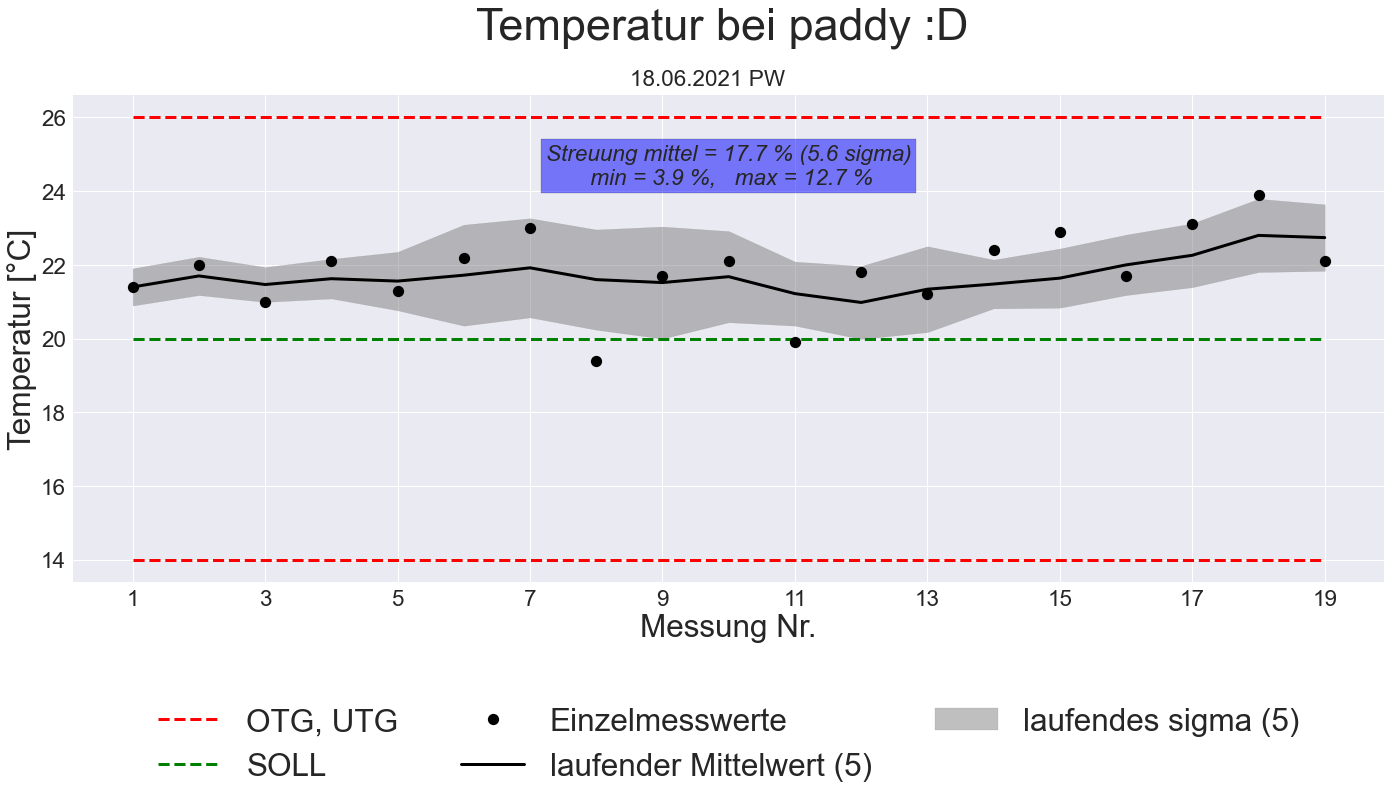

In [148]:
# def y_axis_thousands(x, pos):
#    # 'The two args are the value and tick position'
#     return '{:0,d}'.format(int(x)).replace(",",".")
# formatter = FuncFormatter(y_axis_thousands)

# fig = plt.figure(figsize=(h,v))
# ax = fig.add_subplot()
# ax.yaxis.set_major_formatter(formatter)
plt.figure(figsize=(h,v))

plt.style.use('seaborn')
plt.grid(True)

### SOLL, OTG, UTG ###
plt.plot(df.x_axis,df.OTG, color='red', linestyle = 'dashed', linewidth = lws, label =plot_label_OTUT)
plt.plot(df.x_axis,df.SOLL, color='green', linestyle = 'dashed', linewidth = lws, label =plot_label_SOLL)
plt.plot(df.x_axis,df.UTG, color='red', linestyle = 'dashed', linewidth = lws, label ="")

### values ###
plt.plot(df.x_axis,df['value'], marker='.', linestyle='', 
         color=schwarz, linewidth = lws, label = "Einzelmesswerte", markersize = size*sizefactor_marker)

### Darstellung der rolling Darstellung oder mit konstanten Werten
if rolling_bool == True:
    # rolling
    plt.plot(df.x_axis,df['mean_rolling'], marker='', linestyle='-', color=schwarz, linewidth = lws, 
             label = f'laufender Mittelwert ({rolling_anzahl})', markersize = size*sizefactor_marker)
    plt.plot(df.x_axis,df['std_rolling+'], marker='', linestyle='', color=schwarz, linewidth = lws, 
             label = '', markersize = size*sizefactor_marker)        
    plt.plot(df.x_axis,df['std_rolling-'], marker='', linestyle='', color=schwarz, linewidth = lws, 
             label = '', markersize = size*sizefactor_marker)    
    plt.fill_between(df.x_axis, df['std_rolling+'], df['std_rolling-'] , color='grey',alpha=0.5, label 
                     = f'laufendes sigma ({rolling_anzahl})')
    plt.text(x-0.5, y, f'Streuung mittel = {round((100)*sigma/toleranz,1)} % ({round( 100 / ((100)*sigma/toleranz),1)} sigma)\n min = {streuung_min} %,   max = {streuung_max} %'  , 
         horizontalalignment='center', size=size*sizefactor_textbox, style='italic',
         bbox={'facecolor': "blue", 'alpha': 0.5, 'pad': 5})

else:
    plt.plot(df.x_axis, df["value_mean"], color='grey', linestyle = '-.', linewidth = lws, label=plot_label_Mittelwert)
    plt.plot(df.x_axis,df["value_std+"], color='grey', linestyle = '-', linewidth = lws, label ="")
    plt.plot(df.x_axis,df["value_std-"], color='grey', linestyle = '-', linewidth = lws, label ="")
    plt.fill_between(df.x_axis, df['value_std+'], df['value_std-'] , color='grey',alpha=0.5, label = "±1 sigma")
    plt.text(x-0.5, y, r'mittlere Streuung =  $\frac{sigma\ }{(1/2)\cdot(OTG\ - UTG)\ }\cdot100$ = 'f'{round((100)*sigma/toleranz,1)} % (= {round( 100 / ((100)*sigma/toleranz),1)} sigma)' , 
         horizontalalignment='center', size=size*sizefactor_textbox, style='italic',
         bbox={'facecolor': "blue", 'alpha': 0.5, 'pad': 5})


# plt.text(x-0.5, y, r'mittlere Streuung =  $\frac{sigma\ }{(1/2)\cdot(OTG\ - UTG)\ }\cdot100$ = 'f'{round((100)*sigma/toleranz,1)} % (= {round( 100 / ((100)*sigma/toleranz),1)} sigma)' , 
#      horizontalalignment='center', size=size*sizefactor_textbox, style='italic',
#      bbox={'facecolor': "blue", 'alpha': 0.5, 'pad': 5})

    
    
# plt.text(x-0.5, y, r'mittlere Streuung =  $\frac{sigma\ }{(1/2)\cdot(OTG\ - UTG)\ }\cdot100$ = 'f'{round((100)*sigma/toleranz,1)} % (= {round( 100 / ((100)*sigma/toleranz),1)} sigma)'  , 
#      horizontalalignment='center', size=size*sizefactor_textbox, style='italic',
#      bbox={'facecolor': "blue", 'alpha': 0.5, 'pad': 5})

# Legende 
plt.legend(loc='upper center', 
           bbox_to_anchor=(0.5, -0.2),
           fancybox=True, 
           shadow=True, 
           ncol=3, 
           fontsize=size*sizefactor_legend)

# Schriftgrößen x und y achsenwerte
# plt.margins(x=0)
plt.xticks(fontsize=size*sizefactor_xyticks, rotation = rotation)
plt.yticks(fontsize=size*sizefactor_xyticks)

plt.ylabel(ylabel, fontsize=size*sizefactor_xylabel)
plt.xlabel(xlabel, fontsize=size*sizefactor_xylabel)

plt.title(f'{plot_title}\n', fontsize=size)
plt.suptitle(plot_subtitle , fontsize=size*sizefactor_subtitle, y=0.92)





x_axis=df["x_axis"].tolist()
if max(x_axis) > 10:
    plt.xticks(np.arange(min(x_axis), max(x_axis)+1, round(max(x_axis)/10)))     # Teile x-achse in 10 Teile 
elif max(x_axis) <= 10:
    plt.xticks(np.arange(min(x_axis), max(x_axis)+1, 1))     # Teile x-achse nicht

# Diagramm als Bild exporieren und Auflösung definieren

if rolling_bool == True:
    plt.savefig(pfad + pfad_output + "diagram dynamic mean.png", dpi = dpi, bbox_inches='tight')
    plt.savefig(pfad_onedrive + "diagram dynamic mean.png", dpi = dpi, bbox_inches='tight')
else:
    plt.savefig(pfad + pfad_output + "diagram static mean.png", dpi = dpi, bbox_inches='tight')
    plt.savefig(pfad_onedrive + "diagram static mean.png", dpi = dpi, bbox_inches='tight')
    
plt.show()